# Загрузка модели - LlamaCpp

In [2]:
from langchain.llms import LlamaCpp

In [4]:
# cpu
llm = LlamaCpp(
    model_path="../models/model-q4_K.gguf",
    verbose=True,  # Verbose is required to pass to the callback manager
    n_ctx=2048,
    max_tokens=2048,
)

llama_model_loader: loaded meta data with 21 key-value pairs and 291 tensors from ../models/model-q4_K.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = models
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_count u32              = 32


In [ ]:
# gpu
n_gpu_layers = -1  # The number of layers to put on the GPU. The rest will be on the CPU. If you don't know how many layers there are, you can use -1 to move all to GPU.
n_batch = 512  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.

# Make sure the model path is correct for your system!
llm = LlamaCpp(
    model_path="models/llama-2-7b-chat.Q3_K_M.gguf",
    n_gpu_layers=n_gpu_layers,
    n_batch=n_batch,
    verbose=True,  # Verbose is required to pass to the callback manager
)

# Загрузка и чтение документа

## PyPDFium2Loader

In [4]:
from langchain_community.document_loaders import PyPDFium2Loader

In [6]:
loader = PyPDFium2Loader('../АВТОМАТИЗАЦИЯ КРИОГЕННЫХ ГЕЛИЕВЫХ УСТАНОВОК И СИСТЕМ.pdf')
data = loader.load()
for index, _ in enumerate(data):
    data[index].page_content = data[index].page_content.replace('￾', '').replace('', '-')
len(data)

6

In [7]:
print(data[0].page_content)

41
Технические газы, № 5, 2010
ã И.К. Буткевич
УДК 621.59(075.8)
И.К. Буткевич
Институт физических проблем им. П.Л. Капицы РАН, ул. Косыгина, 2, г. Москва, РФ, 117334
e-mail: butkevich@kapitza.ras.ru
АВТОМАТИЗАЦИЯ КРИОГЕННЫХ ГЕЛИЕВЫХ УСТАНОВОК И СИСТЕМ:
ПРОБЛЕМЫ И ПУТИ РЕШЕНИЯ
Автоматизация современных криогенных гелиевых установок (КГУ) и систем (КГС)
является необходимым условием повышения их эффективности и надёжности. Все
коммерческие КГУ ведущих фирм снабжаются системами автоматического управления (САУ). Рассматриваются основные концептуальные положения и различные
уровни автоматизации на основе отечественных САУ КГУ с поршневыми и турбодетандерами. САУ этого типа предоставляют широкие возможности оператору
участвовать как в процессе пусконаладки системы, так и в её перенастройке в
процессе эксплуатации. Для дальнейшего совершенствования САУ КГУ и КГС обосновывается создание адаптивных систем автоматизации и диагностических программ, предназначенных для предотвращения аварийных си

# Загурзка эмбедингов

In [8]:
from langchain.embeddings import HuggingFaceEmbeddings

In [9]:
embeddings_hf_default = HuggingFaceEmbeddings()

In [10]:
embeddings_hf_custom = HuggingFaceEmbeddings(model_name="../DeepPavlov-rubert-base-cased")

No sentence-transformers model found with name ../DeepPavlov-rubert-base-cased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at ../DeepPavlov-rubert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification

# Загружаем в БД

In [12]:
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import FAISS

In [13]:
text_splitter = CharacterTextSplitter(chunk_size=400, 
                                      chunk_overlap=0, 
                                      separator='\n',
                                      length_function=len,
                                      is_separator_regex=False,
                                     )
docs = text_splitter.split_documents(data)
len(docs)

73

In [14]:
print(docs[0].page_content)

41
Технические газы, № 5, 2010
ã И.К. Буткевич
УДК 621.59(075.8)
И.К. Буткевич
Институт физических проблем им. П.Л. Капицы РАН, ул. Косыгина, 2, г. Москва, РФ, 117334
e-mail: butkevich@kapitza.ras.ru
АВТОМАТИЗАЦИЯ КРИОГЕННЫХ ГЕЛИЕВЫХ УСТАНОВОК И СИСТЕМ:
ПРОБЛЕМЫ И ПУТИ РЕШЕНИЯ
Автоматизация современных криогенных гелиевых установок (КГУ) и систем (КГС)


In [15]:
%%time
db = FAISS.from_documents(docs, embeddings_hf_custom)

CPU times: total: 9min 54s
Wall time: 8min 17s


In [16]:
query = "уровень регулирования позволяет автоматически"
docs_res = db.similarity_search(query)

In [17]:
print(docs_res[0].page_content)

пуск и остановку установки в любое время без специальных предварительных операций, отслеживать изменения параметров, хранить и распечатывать данные, производить аварийное оповещение и осуществлять мониторинг с помощью удалённого доступа.
Основной недостаток этих САУ — достаточно жёсткое отношение к пользователю, существенно ограничивающее его возможности влиять на технологический процесс.


# RAG

In [3]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain.chains import LLMChain
from langchain.prompts import ChatPromptTemplate, PromptTemplate

In [19]:
retriever = db.as_retriever()
retriever

VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain.vectorstores.faiss.FAISS object at 0x00000189BCE5AF10>)

In [20]:
template = """[INST] <<SYS>>
Ты ассистент, который анализирует информацию, представленную в  контексте: {context} и отвечает на вопрос: {question}.
Ответ ты даешь на русском языке.
<</SYS>>

Ответьте на вопрос, основываясь только на следующем контексте:{context}
Вопрос: {question}[/INST]
"""

In [69]:
template_1 = """Используйте следующий контекст, чтобы ответить на вопрос в конце. 
Если вы не знаете ответа, просто скажите, что не знаете, не пытайтесь придумать ответ.

Контекст: {context}
Вопрос: {question}

Ответ:
"""

In [21]:
prompt = PromptTemplate.from_template(template)
prompt

PromptTemplate(input_variables=['context', 'question'], template='[INST] <<SYS>>\nТы ассистент, который анализирует информацию, представленную в  контексте: {context} и отвечает на вопрос: {question}.\nОтвет ты даешь на русском языке.\n<</SYS>>\n\nОтветьте на вопрос, основываясь только на следующем контексте:{context}\nВопрос: {question}[/INST]\n')

In [22]:
llm_chain = LLMChain(prompt=prompt, llm=llm)
llm_chain

LLMChain(prompt=PromptTemplate(input_variables=['context', 'question'], template='[INST] <<SYS>>\nТы ассистент, который анализирует информацию, представленную в  контексте: {context} и отвечает на вопрос: {question}.\nОтвет ты даешь на русском языке.\n<</SYS>>\n\nОтветьте на вопрос, основываясь только на следующем контексте:{context}\nВопрос: {question}[/INST]\n'), llm=LlamaCpp(client=<llama_cpp.llama.Llama object at 0x000001887BD4EAF0>, model_path='../models/model-q4_K.gguf', n_ctx=2048, max_tokens=2048))

In [8]:
question = "Совместно с какой организацией ИФП РАН разработанли и реализовали САУ ожижителя гелия Г-4 с поршневыми детандерами?"

## способ 1

In [24]:
llm

LlamaCpp(client=<llama_cpp.llama.Llama object at 0x000001887BD4EAF0>, model_path='../models/model-q4_K.gguf', n_ctx=2048, max_tokens=2048)

In [29]:
chain = (
    {"context": retriever, "question": lambda x: RunnablePassthrough()}
    | prompt
    | llm
)
chain

{
  context: VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain.vectorstores.faiss.FAISS object at 0x00000189BCE5AF10>),
  question: RunnableLambda(lambda x: RunnablePassthrough())
}
| PromptTemplate(input_variables=['context', 'question'], template='[INST] <<SYS>>\nТы ассистент, который анализирует информацию, представленную в  контексте: {context} и отвечает на вопрос: {question}.\nОтвет ты даешь на русском языке.\n<</SYS>>\n\nОтветьте на вопрос, основываясь только на следующем контексте:{context}\nВопрос: {question}[/INST]\n')
| LlamaCpp(client=<llama_cpp.llama.Llama object at 0x000001887BD4EAF0>, model_path='../models/model-q4_K.gguf', n_ctx=2048, max_tokens=2048)

In [30]:
%%time
res_1 = chain.invoke(question)

Llama.generate: prefix-match hit

llama_print_timings:        load time =   12958.09 ms
llama_print_timings:      sample time =     319.17 ms /    33 runs   (    9.67 ms per token,   103.39 tokens per second)
llama_print_timings: prompt eval time =  498484.95 ms /  2003 tokens (  248.87 ms per token,     4.02 tokens per second)
llama_print_timings:        eval time =   13655.80 ms /    32 runs   (  426.74 ms per token,     2.34 tokens per second)
llama_print_timings:       total time =  547520.05 ms /  2035 tokens


CPU times: total: 31min 16s
Wall time: 10min 42s


In [31]:
question

'Совместно с какой организацией ИФП РАН разработанли и реализовали САУ ожижителя гелия Г-4 с поршневыми детандерами?'

In [32]:
res_1

'Какая установка на основе гелия была создана на базе установки КГУ-150/4,5?'

## способ 2

In [33]:
chain = (
    {"context": retriever, "question": lambda x: RunnablePassthrough()}
    | llm_chain
)
chain

{
  context: VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain.vectorstores.faiss.FAISS object at 0x00000189BCE5AF10>),
  question: RunnableLambda(lambda x: RunnablePassthrough())
}
| LLMChain(prompt=PromptTemplate(input_variables=['context', 'question'], template='[INST] <<SYS>>\nТы ассистент, который анализирует информацию, представленную в  контексте: {context} и отвечает на вопрос: {question}.\nОтвет ты даешь на русском языке.\n<</SYS>>\n\nОтветьте на вопрос, основываясь только на следующем контексте:{context}\nВопрос: {question}[/INST]\n'), llm=LlamaCpp(client=<llama_cpp.llama.Llama object at 0x000001887BD4EAF0>, model_path='../models/model-q4_K.gguf', n_ctx=2048, max_tokens=2048))

In [34]:
%%time
res_2 = chain.invoke(question)

Llama.generate: prefix-match hit

llama_print_timings:        load time =   12958.09 ms
llama_print_timings:      sample time =      58.55 ms /    29 runs   (    2.02 ms per token,   495.35 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   26423.74 ms /    29 runs   (  911.16 ms per token,     1.10 tokens per second)
llama_print_timings:       total time =   30721.28 ms /    30 tokens


CPU times: total: 1min 24s
Wall time: 2min 26s


In [35]:
question

'Совместно с какой организацией ИФП РАН разработанли и реализовали САУ ожижителя гелия Г-4 с поршневыми детандерами?'

In [36]:
res_2

{'context': [Document(page_content='В ИФП РАН совместно с Санкт-Петербургской\r\nфирмой «Вертикаль» разработана и реализована САУ\r\nожижителя гелия Г-4 с поршневыми детандерами, являющегося прототипом промышленной установки\r\nКГУ-150/4,5 [1]. Сейчас совместно с ОАО «НПО Гелиймаш» с учётом имеющегося опыта создаётся автоматизированный турбодетандерный ожижитель гелия\r\nОГ-100.', metadata={'source': '../АВТОМАТИЗАЦИЯ КРИОГЕННЫХ ГЕЛИЕВЫХ УСТАНОВОК И СИСТЕМ.pdf', 'page': 4}),
  Document(page_content='режима, локализуя некие случайные или закономерные, например, слив жидкого гелия из сборника криогенного блока в сосуды Дьюара, возмущения. Впервые на отечественных КГС такая стабилизация параметров была осуществлена на установке КГУ-150/4,5\r\nв составе стендовой КГС СПК-100 в лаборатории\r\nВНИИКриогенмаша. Позже эти контуры были реализованы на мини-ЭВМ СМ-2. Наиболее полно уровень', metadata={'source': '../АВТОМАТИЗАЦИЯ КРИОГЕННЫХ ГЕЛИЕВЫХ УСТАНОВОК И СИСТЕМ.pdf', 'page': 1}),
  Document

## способ 3 - RetrievalQA
**работает хорошо**

In [37]:
from langchain.chains import RetrievalQA

# https://python.langchain.com/docs/modules/chains/#legacy-chains

In [38]:
qa_chain = RetrievalQA.from_chain_type(
llm=llm,
chain_type='stuff',
retriever=retriever
)
qa_chain

RetrievalQA(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['context', 'question'], template="Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n{context}\n\nQuestion: {question}\nHelpful Answer:"), llm=LlamaCpp(client=<llama_cpp.llama.Llama object at 0x000001887BD4EAF0>, model_path='../models/model-q4_K.gguf', n_ctx=2048, max_tokens=2048)), document_variable_name='context'), retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain.vectorstores.faiss.FAISS object at 0x00000189BCE5AF10>))

In [39]:
%%time
query = question

res_3 = qa_chain.run(query)

Llama.generate: prefix-match hit

llama_print_timings:        load time =   12958.09 ms
llama_print_timings:      sample time =     239.09 ms /    11 runs   (   21.73 ms per token,    46.01 tokens per second)
llama_print_timings: prompt eval time =  210027.98 ms /   758 tokens (  277.08 ms per token,     3.61 tokens per second)
llama_print_timings:        eval time =    6131.10 ms /    10 runs   (  613.11 ms per token,     1.63 tokens per second)
llama_print_timings:       total time =  252005.99 ms /   768 tokens


CPU times: total: 12min 30s
Wall time: 6min 36s


In [40]:
question

'Совместно с какой организацией ИФП РАН разработанли и реализовали САУ ожижителя гелия Г-4 с поршневыми детандерами?'

In [41]:
res_3

' ОАО «Вертикаль»'

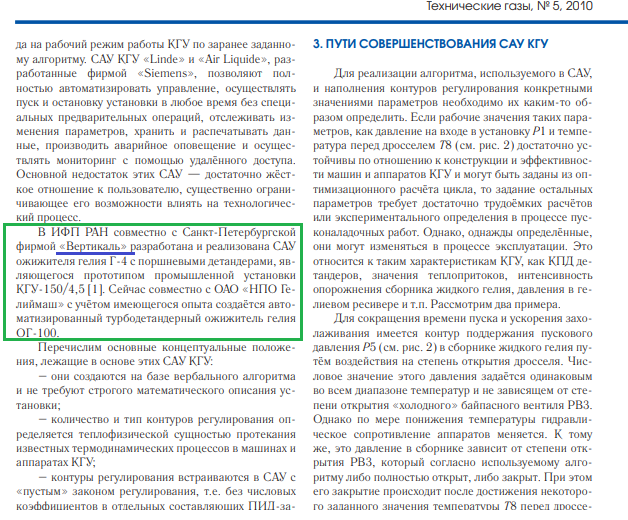

## ответ без RAG

In [5]:
template = """[INST] <<SYS>>
Ответьте на вопрос.
Если вы не знаете ответа, просто скажите, что не знаете, не пытайтесь придумать ответ.
Вопрос: {question}[/INST]
"""
prompt = PromptTemplate.from_template(template)
prompt

PromptTemplate(input_variables=['question'], template='[INST] <<SYS>>\nОтветьте на вопрос.\nЕсли вы не знаете ответа, просто скажите, что не знаете, не пытайтесь придумать ответ.\nВопрос: {question}[/INST]\n')

In [6]:
llm_chain = LLMChain(prompt=prompt, llm=llm)
llm_chain

LLMChain(prompt=PromptTemplate(input_variables=['question'], template='[INST] <<SYS>>\nОтветьте на вопрос.\nЕсли вы не знаете ответа, просто скажите, что не знаете, не пытайтесь придумать ответ.\nВопрос: {question}[/INST]\n'), llm=LlamaCpp(client=<llama_cpp.llama.Llama object at 0x000001734429AD60>, model_path='../models/model-q4_K.gguf', n_ctx=2048, max_tokens=2048))

In [9]:
%%time
input_variables_dict = {'question': question}
result = llm_chain.run(input_variables_dict)


llama_print_timings:        load time =    9845.30 ms
llama_print_timings:      sample time =     258.20 ms /   106 runs   (    2.44 ms per token,   410.53 tokens per second)
llama_print_timings: prompt eval time =   57992.78 ms /   117 tokens (  495.66 ms per token,     2.02 tokens per second)
llama_print_timings:        eval time =   37724.01 ms /   105 runs   (  359.28 ms per token,     2.78 tokens per second)
llama_print_timings:       total time =  105213.50 ms /   222 tokens


CPU times: total: 5min 5s
Wall time: 1min 47s


In [10]:
result

'Уральский филиал Института физико-химического инженерного обеспечения (ИФП) РАН совместно с ОАО Уральская электрометаллургическая компания (УЭМК) разработали и реализовали солнечно-активные устройства охлаждения ожижителя гелия Г-4 с поршневыми детандерами.'

In [11]:
llm_chain = prompt | llm
llm_chain

PromptTemplate(input_variables=['question'], template='[INST] <<SYS>>\nОтветьте на вопрос.\nЕсли вы не знаете ответа, просто скажите, что не знаете, не пытайтесь придумать ответ.\nВопрос: {question}[/INST]\n')
| LlamaCpp(client=<llama_cpp.llama.Llama object at 0x000001734429AD60>, model_path='../models/model-q4_K.gguf', n_ctx=2048, max_tokens=2048)

In [12]:
%%time
result = llm_chain.invoke(input_variables_dict)

Llama.generate: prefix-match hit

llama_print_timings:        load time =    9845.30 ms
llama_print_timings:      sample time =      41.51 ms /    65 runs   (    0.64 ms per token,  1565.85 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   27928.65 ms /    65 runs   (  429.67 ms per token,     2.33 tokens per second)
llama_print_timings:       total time =   31706.79 ms /    66 tokens


CPU times: total: 1min 49s
Wall time: 32.7 s


In [13]:
result

'Ответ: ИФП РАН совместно с ОАО "Кратковский завод металлоизделий" разработали и реализовали САУ ожижителя гелия G-4 с поршневыми детандерами.'